 # About Dataset
## Dataset History
- A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
- The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

- Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [78]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Load the dataset
df=pd.read_csv('Black Friday Sales.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [81]:
df.shape

(550068, 12)

In [82]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [83]:
df = df.drop(columns=['User_ID','Product_ID','Product_Category_3'])

In [84]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969


In [85]:
df.rename(columns={'City_Category':'City','Stay_In_Current_City_Years':'Years_in_City'},inplace=True)

In [86]:
df.head(2)

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200


In [87]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

## Classifying Age into Categorical Data

In [88]:
df['Age']=df['Age'].map({'0-17':'Child','18-25':'Teenage','26-35':'Adult','46-50':'Adult','51-55':'Old','55+':'Old'})

In [89]:
df['Age'].unique()

array(['Child', 'Old', 'Adult', nan, 'Teenage'], dtype=object)

In [90]:
df['Age'].isna().sum()

110013

## Filling Nan Values



In [91]:
df.isnull().sum()

Gender                     0
Age                   110013
Occupation                 0
City                       0
Years_in_City              0
Marital_Status             0
Product_Category_1         0
Product_Category_2    173638
Purchase                   0
dtype: int64

In [92]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [93]:
df.groupby(['Age']).median()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Age,,,,,
Adult,7.0,0.0,5.0,9.0,8031.0
Child,10.0,0.0,5.0,8.0,7986.0
Old,7.0,1.0,5.0,11.0,8122.0
Teenage,4.0,0.0,5.0,8.0,8027.0


In [94]:
df.loc[df['Age']=='Adult','Product_Category_2'].fillna(9.0,inplace=True)

In [95]:
df.loc[df['Age']=='Child','Product_Category_2'].fillna(8.0,inplace=True)

In [96]:
df.loc[df['Age']=='Old','Product_Category_2'].fillna(11.0,inplace=True)

In [97]:
df.loc[df['Age']=='Teenage','Product_Category_2'].fillna(8.0,inplace=True)

In [104]:
df.Product_Category_2.median()

9.0

In [105]:
df.Product_Category_2.mean()

9.842329251122386

In [106]:
df.Product_Category_2.fillna(df.Product_Category_2.median(),inplace=True)

In [107]:
df.Product_Category_2.isna().sum()

0

In [130]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [132]:
# Denoting Male And Female by 0 & 1 respectively
# to convert them into integer
# Male = 0 and Female = 1
df['Gender']=df['Gender'].map({'M':0,'F':1})

In [133]:
df.Gender.unique()

array([1, 0], dtype=int64)

In [134]:
df.dtypes

Gender                  int64
Age                    object
Occupation              int64
City                   object
Years_in_City          object
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
dtype: object

In [135]:
df.head()

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,Child,10,A,2,0,3,9.0,8370
1,1,Child,10,A,2,0,1,6.0,15200
2,1,Child,10,A,2,0,12,9.0,1422
3,1,Child,10,A,2,0,12,14.0,1057
4,0,Old,16,C,4+,0,8,9.0,7969


# Data Visualisation


In [140]:
df.shape

(550068, 9)

<AxesSubplot:>

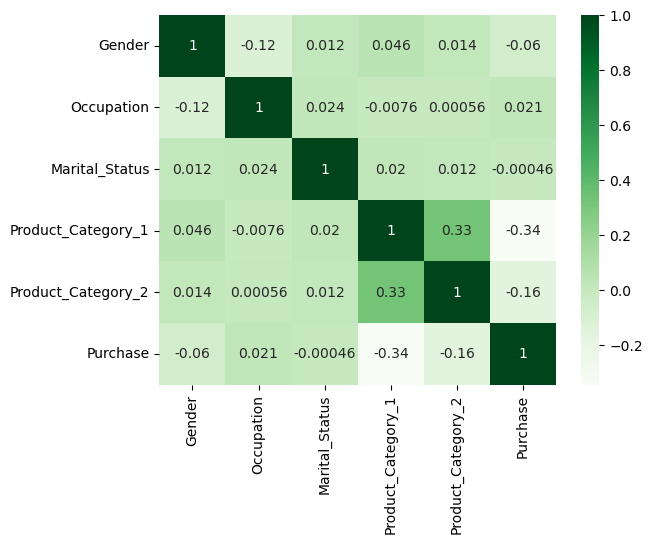

In [141]:
sns.heatmap(df.corr(),cmap='Greens',annot=True)

Text(0.5, 1.0, 'Years_in_city')

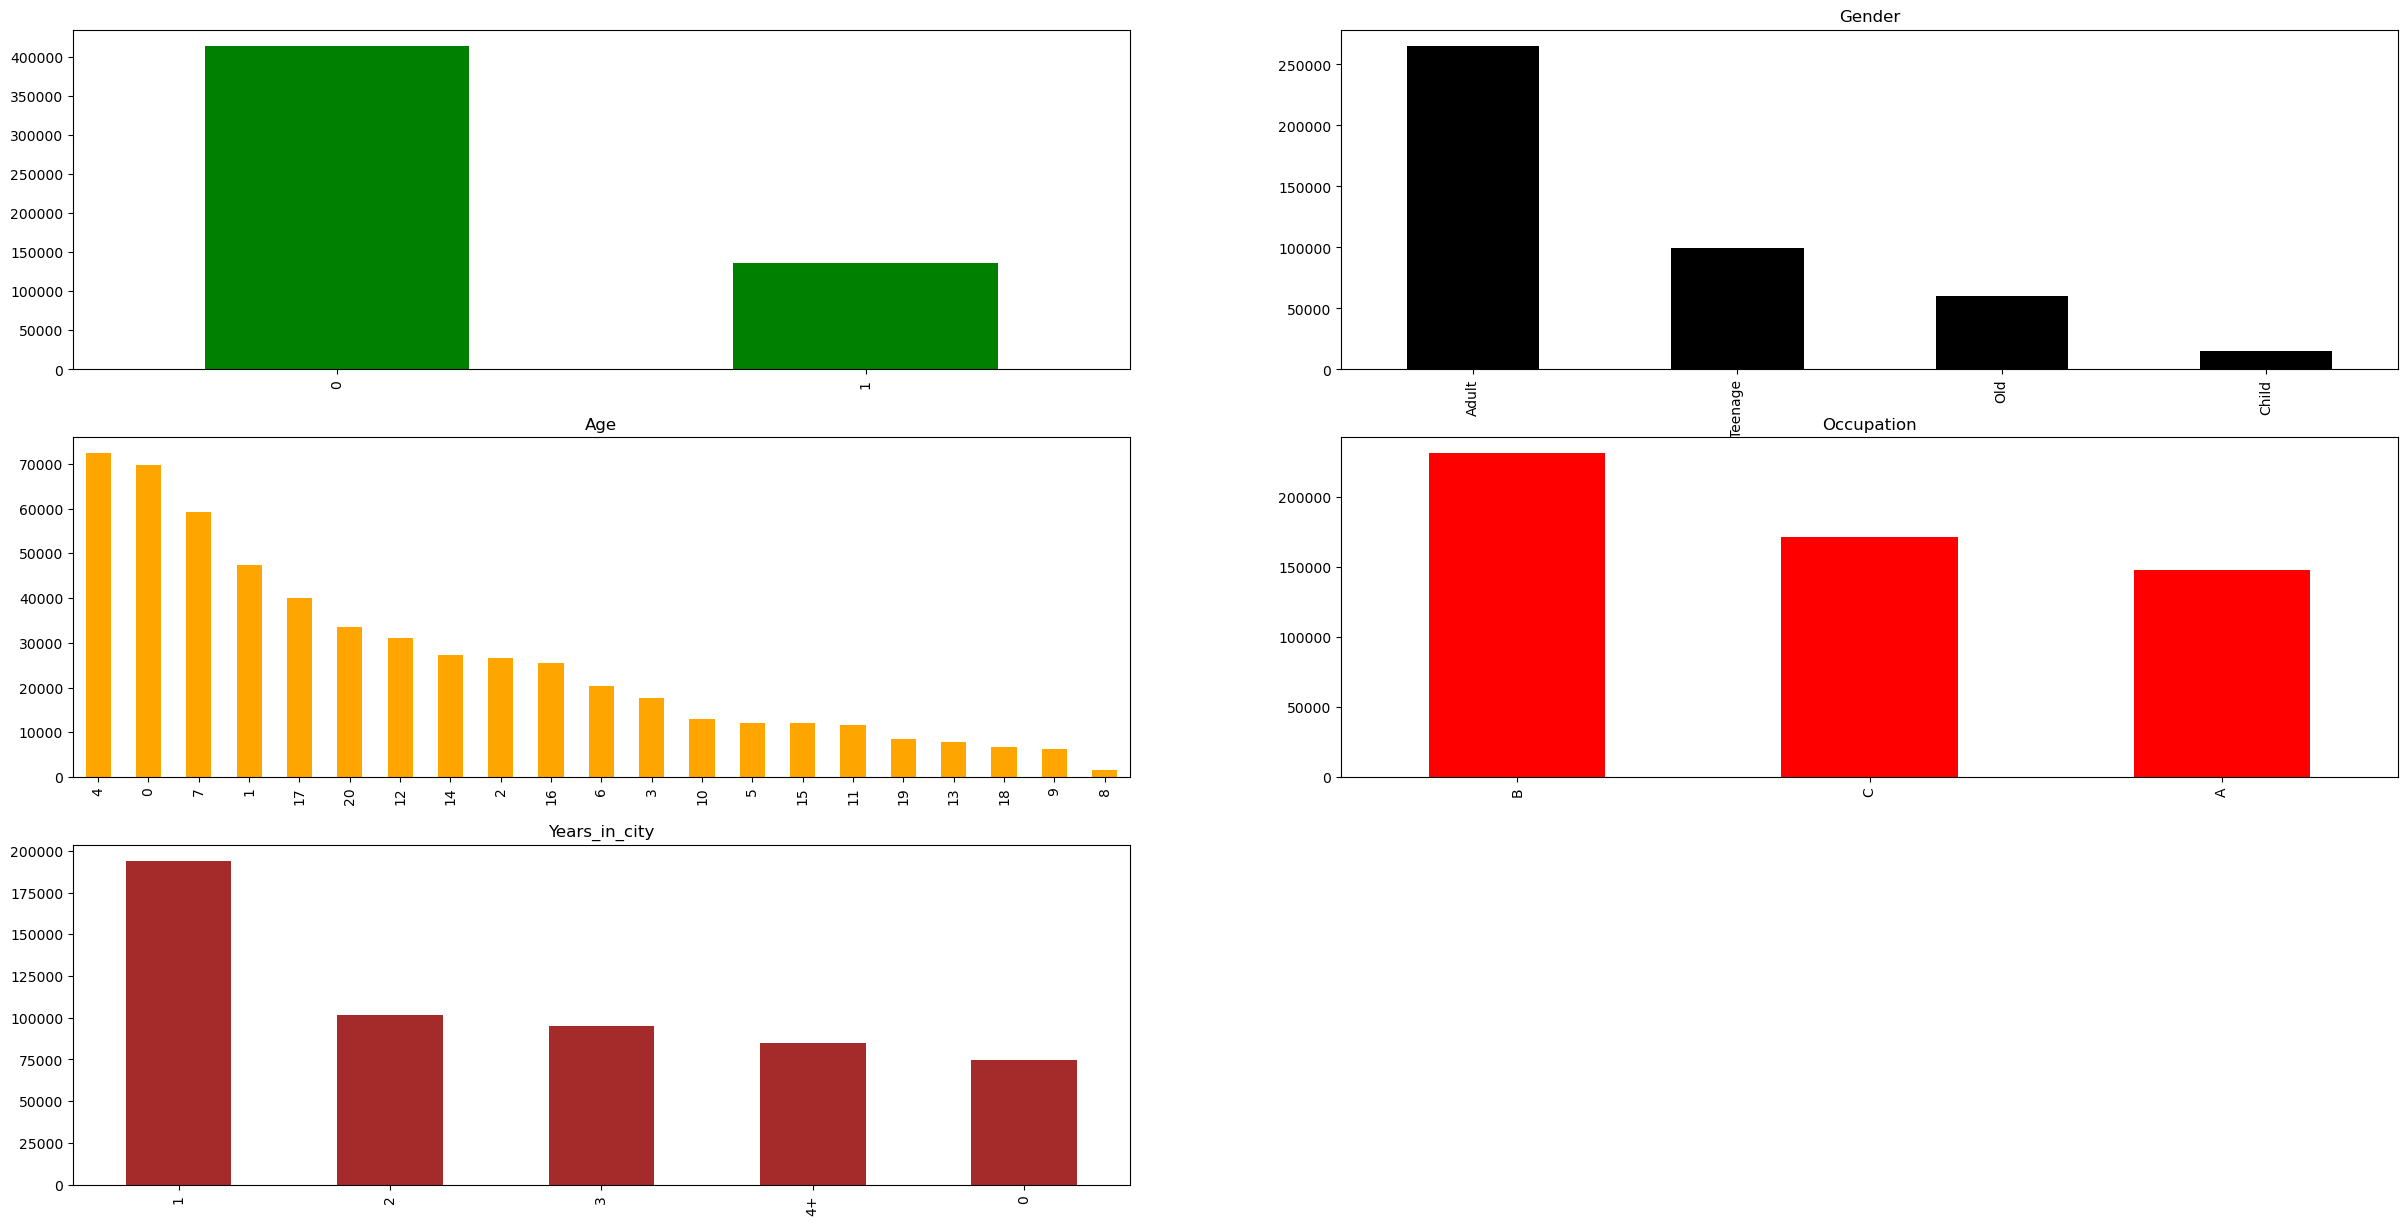

In [175]:
plt.figure(figsize=(30,15))
plt.subplot(3,2,1)
df['Gender'].value_counts().plot(kind='bar',color='green')
plt.subplot(3,2,2)
plt.title('Gender')
df['Age'].value_counts().plot(kind='bar',color='black')
plt.subplot(3,2,3)
plt.title('Age')
df['Occupation'].value_counts().plot(kind='bar',color='orange')
plt.subplot(3,2,4)
plt.title('Occupation')
df['City'].value_counts().plot(kind='bar',color='red')
plt.subplot(3,2,5)
df['Years_in_City'].value_counts().plot(kind='bar',color='brown')
plt.title('Years_in_city')


## Product Category 1 and Product Category 2 

Text(0.5, 1.0, 'Product_Category_2')

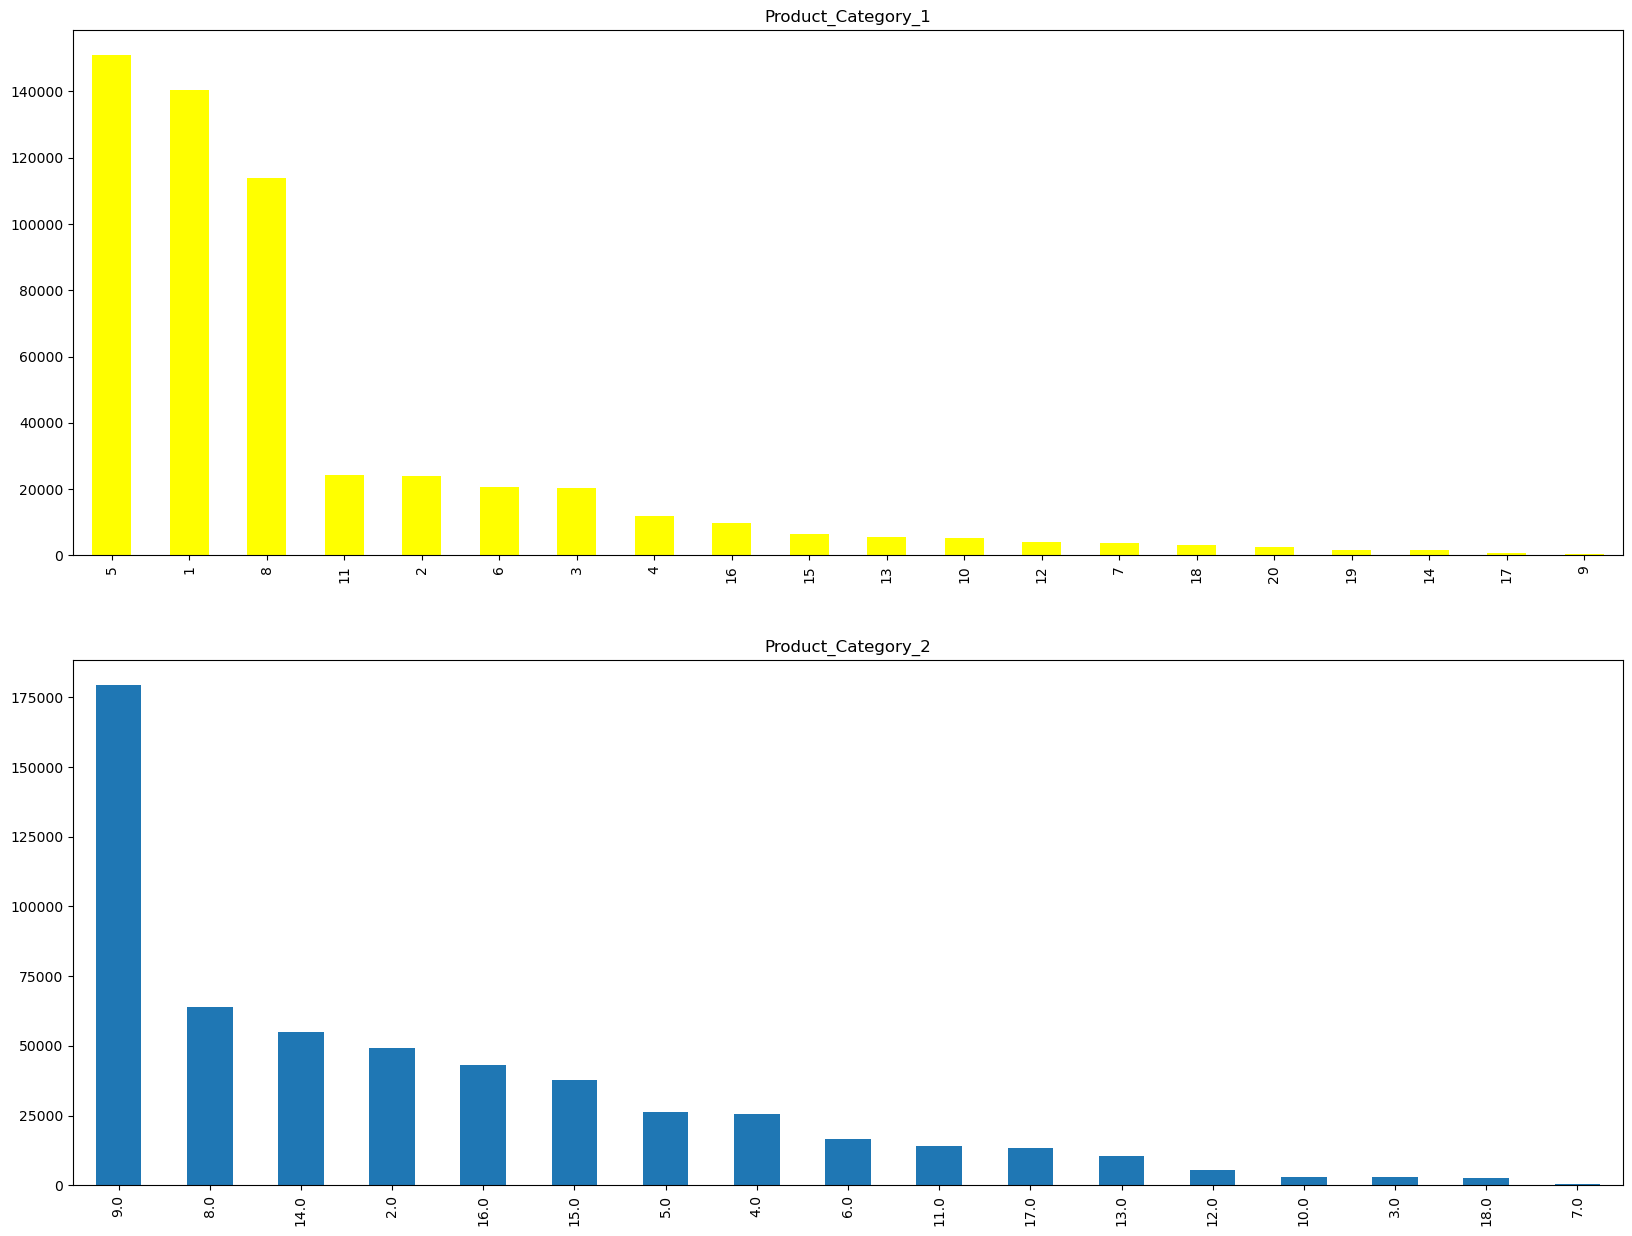

In [184]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
df['Product_Category_1'].value_counts().plot(kind='bar',color='yellow')
plt.title('Product_Category_1')
plt.subplot(2,1,2)
df['Product_Category_2'].value_counts().plot(kind='bar')
plt.title('Product_Category_2')

Text(0.5, 1.0, 'Gender Vs Purchase')

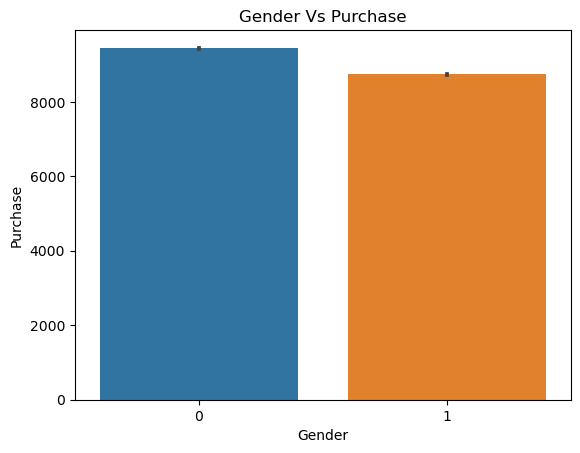

In [193]:
sns.barplot(x=df['Gender'],y=df['Purchase'])
plt.title('Gender Vs Purchase')

Text(0.5, 1.0, 'City Vs Purchase')

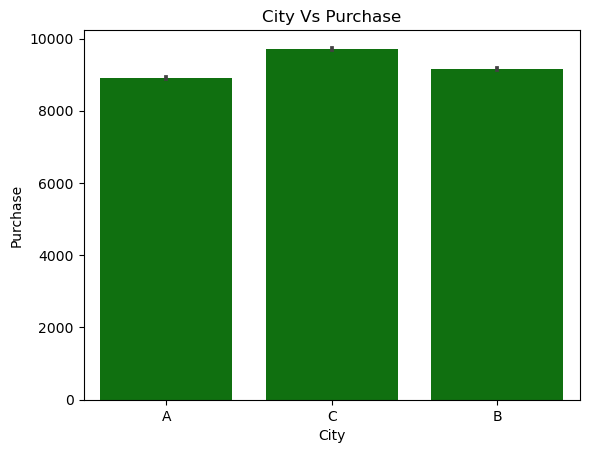

In [196]:
sns.barplot(x=df['City'],y=df['Purchase'],color='green')
plt.title('City Vs Purchase')

Text(0.5, 1.0, 'Occupation Vs Purchase')

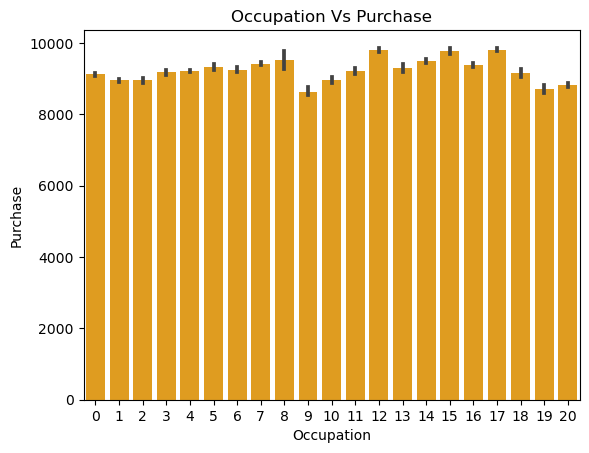

In [198]:
sns.barplot(x=df['Occupation'],y=df['Purchase'],color='orange')
plt.title('Occupation Vs Purchase')